# Analysis of results with the simple configuration

## Setup
### Imports

In [1]:
# imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
results_path = 'results\\sudden_3_attribute_values\\10000\\100_iter_results.csv'

Create the results table

In [3]:
# load the results csv file
results_df_raw = pd.read_csv(results_path)
display(results_df_raw.head())

,config_window_generator_type,config_window_size,config_population_comparer,config_threshold,config_max_distance,config_slide_by,config_proportional_phi,number_of_correct_detections,number_of_true_changes,number_of_detections,precision,recall,f1_score,mean_lag,all_lags,config_event_log_file_path,compute_time
0,fixed,100,GTestPC,0.05,300,10,0.5,5,5,10,0.500000,1.0,0.666667,-27.0,"[-29, -19, -19, -9, -59]",data\synthetic\attribute_drift\sudden_3_attrib...,4.478358
1,fixed,100,GTestPC,0.05,300,10,1.0,5,5,5,1.000000,1.0,1.000000,-27.0,"[-29, -19, -19, -9, -59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.869628
2,fixed,100,GTestPC,0.05,300,20,0.5,5,5,9,0.555556,1.0,0.714286,-31.0,"[-39, -19, -19, -19, -59]",data\synthetic\attribute_drift\sudden_3_attrib...,2.123858
3,fixed,100,GTestPC,0.05,300,20,1.0,5,5,5,1.000000,1.0,1.000000,-31.0,"[-39, -19, -19, -19, -59]",data\synthetic\attribute_drift\sudden_3_attrib...,2.171962
4,fixed,200,GTestPC,0.05,300,10,0.5,5,5,9,0.555556,1.0,0.714286,-23.0,"[-39, -19, -19, -9, -29]",data\synthetic\attribute_drift\sudden_3_attrib...,5.526834


In [5]:
# drop some columns that are not needed
drop_columns = ['config_event_log_file_path', 'all_lags']
results_df = results_df_raw.drop(columns=drop_columns)

# rename existing columns
results_df.columns= ['window generator', 'window size',
       'population comparer', 'threshold', 'max distance',
       'slide by', 'phi prime', 'number of correct detections',
       'number of true changes', 'number of detections', 'precision', 'recall',
       'f1 score', 'lag', 'compute time']

# define the configuration columns to group results on 
config_columns = ['window generator', 'window size',
       'population comparer', 'threshold', 'max distance', 'phi prime',
       'slide by']

# rename population comparers 
name_mapping = {
       'ChiSquaredPC': 'Chi Squared',
       'GTestPC': 'G test',
       'HellingerDistancePC': 'Hellinger Dist.',
       'KSTestPC': 'KS test'
}
results_df['population comparer'] = pd.Series([name_mapping[comparer] for comparer in results_df['population comparer']])

results_df = results_df.groupby(by=config_columns).agg({
    'number of correct detections': ['sum'],
    'number of true changes': ['sum'],
    'number of detections': ['sum'],
    'precision': ['mean'],
    'recall': ['mean'],
    'f1 score': ['mean'],
    'lag': ['mean'],
    'compute time': ['mean']
})

results_df = results_df.reset_index()

# recalculate precision, recall and f1
results_df[('precision', 'true')] = results_df['number of correct detections'] / results_df['number of detections']
results_df[('recall', 'true')] = results_df['number of correct detections'] / results_df['number of true changes']
results_df[('f1 score', 'true')] = 2 / (1/results_df[('precision', 'true')] + 1/results_df[('recall', 'true')])

results_df

,window generator,window size,population comparer,threshold,max distance,phi prime,slide by,number of correct detections,number of true changes,number of detections,precision,recall,f1 score,lag,compute time,precision,recall,f1 score
,,,,,,,,sum,sum,sum,mean,mean,mean,mean,mean,true,true,true
0,adaptive,100,G test,0.05,300,0.5,10,5,5,10,0.500000,1.0,0.666667,-47.000000,4.972592,0.500000,1.0,0.666667
1,adaptive,100,G test,0.05,300,0.5,20,5,5,9,0.555556,1.0,0.714286,-31.000000,3.280658,0.555556,1.0,0.714286
2,adaptive,100,G test,0.05,300,1.0,10,5,5,5,1.000000,1.0,1.000000,-47.000000,6.072971,1.000000,1.0,1.000000
3,adaptive,100,G test,0.05,300,1.0,20,5,5,5,1.000000,1.0,1.000000,-31.000000,2.654769,1.000000,1.0,1.000000
4,adaptive,200,G test,0.05,300,0.5,10,5,5,9,0.555556,1.0,0.714286,-63.000000,6.225232,0.555556,1.0,0.714286
5,adaptive,200,G test,0.05,300,0.5,20,5,5,11,0.454545,1.0,0.625000,-27.000000,12.239171,0.454545,1.0,0.625000
6,adaptive,200,G test,0.05,300,1.0,10,3,5,3,1.000000,0.6,0.750000,-25.666667,12.402883,1.000000,0.6,0.750000
7,adaptive,200,G test,0.05,300,1.0,20,5,5,5,1.000000,1.0,1.000000,-27.000000,5.129110,1.000000,1.0,1.000000
8,fixed,100,G test,0.05,300,0.5,10,5,5,10,0.500000,1.0,0.666667,-27.000000,4.478358,0.500000,1.0,0.666667


In [6]:
# simplify by deleting non-interesting columns and getting rid of multiindex
drop_columns = [('precision', 'mean'), ('recall', 'mean'), ('f1 score', 'mean'), 
                ('number of correct detections', 'sum'), ('number of true changes', 'sum'), 
                ('number of detections', 'sum')]

all_results = results_df.drop(columns=drop_columns)
all_results.columns = all_results.columns.get_level_values(0)

# reorder columns
ordered_columns = config_columns + ['precision', 'recall', 'f1 score', 'lag', 'compute time']

all_results = all_results[ordered_columns]

# also create a results df without the HellingerDistanceComparer and slide by 5 or 10
simple_results_df = all_results[all_results['population comparer']!='Hellinger Dist.']
simple_results_df = simple_results_df.query("`slide by` in (5, 10)")#population comparer` == "KS test")[simple_results_df['slide by'] == 5 or simple_results_df['slide by'] == 10]

# drop the threshold and max distance (they are always the same)
simple_results_df = simple_results_df.drop(columns=['threshold', 'max distance'])

# set the configuration columns as index
all_results = all_results.set_index(config_columns)
simple_results_df = simple_results_df.set_index(['window generator', 'window size', 'population comparer', 'phi prime', 'slide by'])

## Analysis

### Get an overview of the simple results table
Show the table, write to Latex.

Also, produce a facet grid plot.

In [7]:
simple_results_df

precision  \
window generator window size population comparer phi prime slide by              
adaptive         100         G test              0.5       10         0.500000   
                                                 1.0       10         1.000000   
                 200         G test              0.5       10         0.555556   
                                                 1.0       10         1.000000   
fixed            100         G test              0.5       10         0.500000   
                                                 1.0       10         1.000000   
                 200         G test              0.5       10         0.555556   
                                                 1.0       10         1.000000   

                                                                     recall  \
window generator window size population comparer phi prime slide by           
adaptive         100         G test              0.5       10           1.0   
                                                 1.0       10           1.0   
                 200         G test              0.5       10           1.0   
                                                 1.0       10           0.6   
fixed            100         G test              0.5       10           1.0   
                                                 1.0       10           1.0   
                 200         G test              0.5       10           1.0   
                                                 1.0       10           1.0   

                                                                     f1 score  \
window generator window size population comparer phi prime slide by             
adaptive         100         G test              0.5       10        0.666667   
                                                 1.0       10        1.000000   
                 200         G test              0.5       10        0.714286   
                                                 1.0       10        0.750000   
fixed            100         G test              0.5       10        0.666667   
                                                 1.0       10        1.000000   
                 200         G test              0.5       10        0.714286   
                                                 1.0       10        1.000000   

                                                                           lag  \
window generator window size population comparer phi prime slide by              
adaptive         100         G test              0.5       10       -47.000000   
                                                 1.0       10       -47.000000   
                 200         G test              0.5       10       -63.000000   
                                                 1.0       10       -25.666667   
fixed            100         G test              0.5       10       -27.000000   
                                                 1.0       10       -27.000000   
                 200         G test              0.5       10       -23.000000   
                                                 1.0       10       -23.000000   

                                                                     compute time  
window generator window size population comparer phi prime slide by                
adaptive         100         G test              0.5       10            4.972592  
                                                 1.0       10            6.072971  
                 200         G test              0.5       10            6.225232  
                                                 1.0       10           12.402883  
fixed            100         G test              0.5       10            4.478358  
                                                 1.0       10            3.869628  
                 200         G test              0.5       10            5.526834  
                                                 1.0       10        

In [8]:
# write simple results to latex for results table
path = 'results/latex/simple_results_table.tex'
with open(path, 'w') as file:
    simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Simple Configuration', label='tab:results_simple')

C:\Users\Lennart\AppData\Local\Temp\ipykernel_9008\1510524082.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Simple Configuration', label='tab:results_simple')


In [ ]:
# get a generatl statistic across all configurations
general_stats = simple_results_df.describe()

general_stats = general_stats.loc[['mean', 'std', 'min', 'max']]

display(general_stats)

# write general stats to latex
path = 'results/latex/simple_general_stats.tex'
with open(path, 'w') as file:
    general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Simple Configuration', label='tab:results_simple_agg')

# also write to csv for comparison with complex configuration
path = 'results/csv/simple_general_stats.csv'
with open(path, 'w') as file:
    general_stats.to_csv(file)

,precision,recall,f1 score,lag,compute time
mean,0.532902,0.988083,0.623781,-38.431847,5.781396
std,0.354753,0.012981,0.300479,11.626003,1.889354
min,0.127380,0.958000,0.225718,-58.032500,3.507890
max,0.995984,1.000000,0.993988,-22.462500,8.532537


C:\Users\Lennart\AppData\Local\Temp\ipykernel_23236\2700325523.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Simple Configuration', label='tab:results_simple_agg')


In [ ]:
# Get the result with the highest f1 score
df = simple_results_df.reset_index()
df.sort_values('f1 score', ascending=False)[:1]

,window generator,window size,population comparer,phi prime,slide by,precision,recall,f1 score,lag,compute time
10,adaptive,150,G test,1.0,5,0.995984,0.992,0.993988,-56.3875,8.532537


In [ ]:
df = simple_results_df.reset_index()
columns_selected = df.corr()[['precision', 'recall', 'f1 score', 'lag', 'compute time']]
columns_selected.loc[['window size', 'phi prime', 'slide by']]

,precision,recall,f1 score,lag,compute time
window size,0.115978,0.570507,0.155114,-0.391016,0.264640
phi prime,0.987299,-0.685259,0.967050,-0.167227,0.003710
slide by,-0.032035,-0.019673,-0.040523,-0.089795,-0.953022


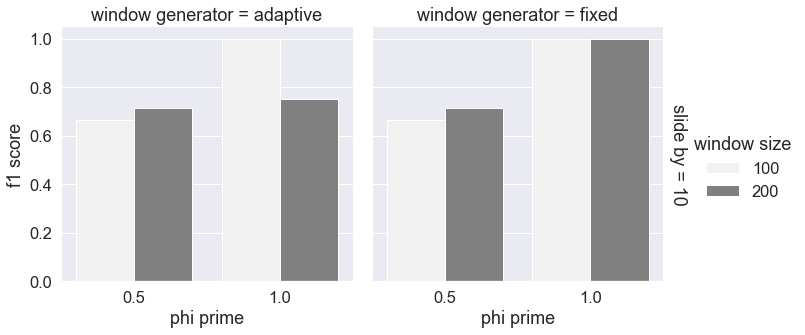

In [9]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="phi prime", y="f1 score",
                hue="window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [ ]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['f1 score']

window generator
adaptive    0.625443
fixed       0.622119
Name: f1 score, dtype: float64

- Window generator is not strongly correlated (slightly better score for the adaptive window generator)
- KS test is far superior than the chi square test (more robust, better precision, see overview table)
- larger slide by is preferred
- smaller window size is preferred


The positive influence of "slide by" on f1 score is hard to understand. Therefore, additional runs with different slide by settings where performed.

ValueError: attempt to get argmax of an empty sequence

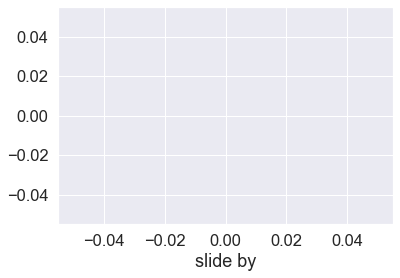

In [ ]:
slide_by_df = all_results.query('(`population comparer` == "KS test") and (`window generator` == "fixed") and (`window size` == 200)')

# get the slide_by configuration into the index
slide_by_df = slide_by_df.reset_index()
slide_by_df.index = slide_by_df['slide by']

# only get precision, recall, f1, mean_lag and compute time
slide_by_df = slide_by_df[['slide by', 'precision', 'recall', 'f1 score', 'lag', 'compute time']]
slide_by_df

# show precision, recall and f1 in a plot
precision_values = slide_by_df['precision']
recall_values = slide_by_df['recall']
f1_values = slide_by_df['f1 score']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(precision_values.index, precision_values, label='precision', ls='dashed', color='grey')
ax.plot(recall_values.index, recall_values, label='recall', ls='dotted', color='grey')
ax.plot(f1_values.index, f1_values, label='f1 score', ls='solid', color='grey')
plt.xlabel("slide by")

# add the maximum f1-score with a label
loc_max_f1 = slide_by_df['f1 score'].idxmax()
max_f1 = slide_by_df['f1 score'][loc_max_f1]

# add the label to the graph
ax.scatter(x=[loc_max_f1], 
            y=[max_f1], 
            marker='x', 
            color='black')
ax.annotate(f'Max: ({loc_max_f1}, {max_f1:.2})', xy=(loc_max_f1, max_f1+0.01))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.show()

We can clearly see how different settings of "slide by" impact precision and recall. For low "slide by" settings, there are many false positives. Hence, the precision is very low. The more it slides, the higher the precision, while recall decreases (more false negatives).

In conclusion, higher "slide by" settings make the approach more robust but also less sensitive. A value of 15 to 25 appears to strike a balance between the two.

Next, we quickly confirm whether the runtime really decreases linearly with increasing "slide by".

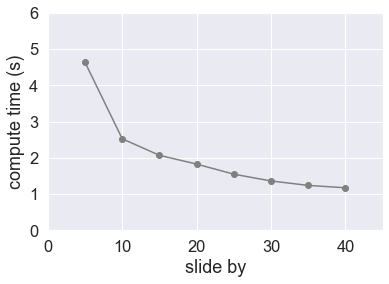

In [ ]:
slide_by_df['compute time'].plot(color='grey', marker='o')

plt.ylabel('compute time (s)')
plt.ylim(0, 6)
plt.xlim(0, 45)
plt.show()


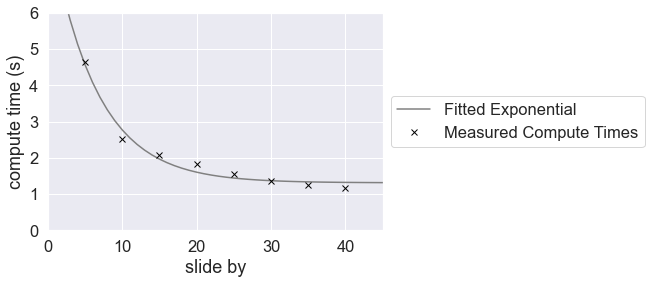

In [ ]:
# attempt to fit an exponential function to the compute time - "slide by" graph
x = slide_by_df['compute time'].index
y = slide_by_df['compute time']

def exp_function(x, a, k, b):
    return a * np.exp(-k*x) + b

p0 = (1.,0.1,1.)
opt, pcov = curve_fit(exp_function, x, y, p0)

# get optimization result into variables
a, k, b = opt

x2 = np.arange(0, 50, step=1)
y2 = exp_function(x2, a, k, b)

fig, ax = plt.subplots()

ax.plot(x2, y2, color='grey', label='Fitted Exponential')
ax.plot(x, y, 'x', color='black', label='Measured Compute Times')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.ylabel('compute time (s)')
plt.xlabel('slide by')
plt.ylim(0, 6)
plt.xlim(0, 45)
plt.show()

Although the number of computations decreases linarly with "slide by", the compute time decreases exponentially.

### Lag

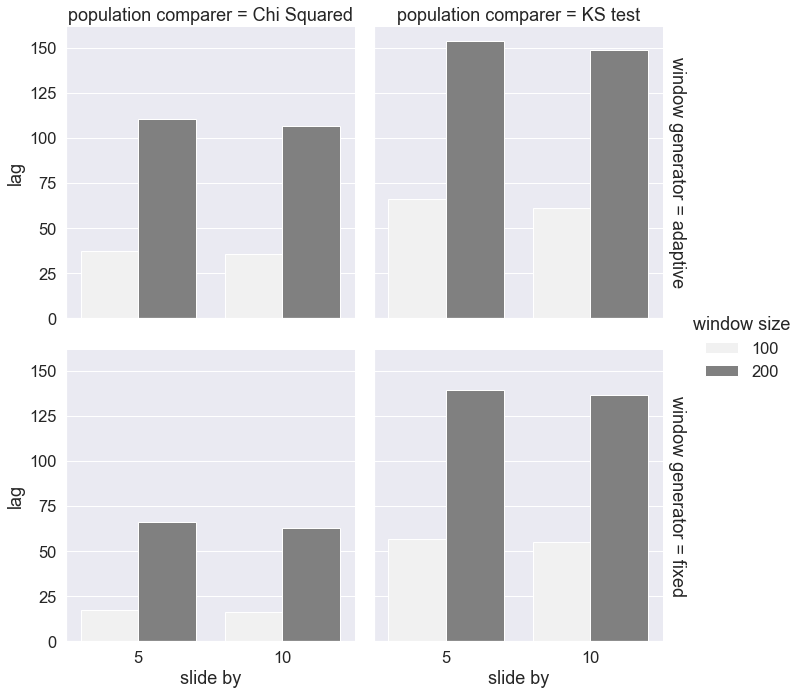

In [ ]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="slide by", y="lag",
                hue="window size", col="population comparer",
                row="window generator",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [ ]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['lag']

window generator
adaptive    65.591185
fixed       51.126812
Name: lag, dtype: float64

- we observe no significant difference between the adaptive or fixed window generator (adaptive is a bit better)
- Chi Squared has a lower lag (probably over sensitive)
- smaller window size equals lower lag
- larger slide by results in marginally smaller lag

### Compute Time


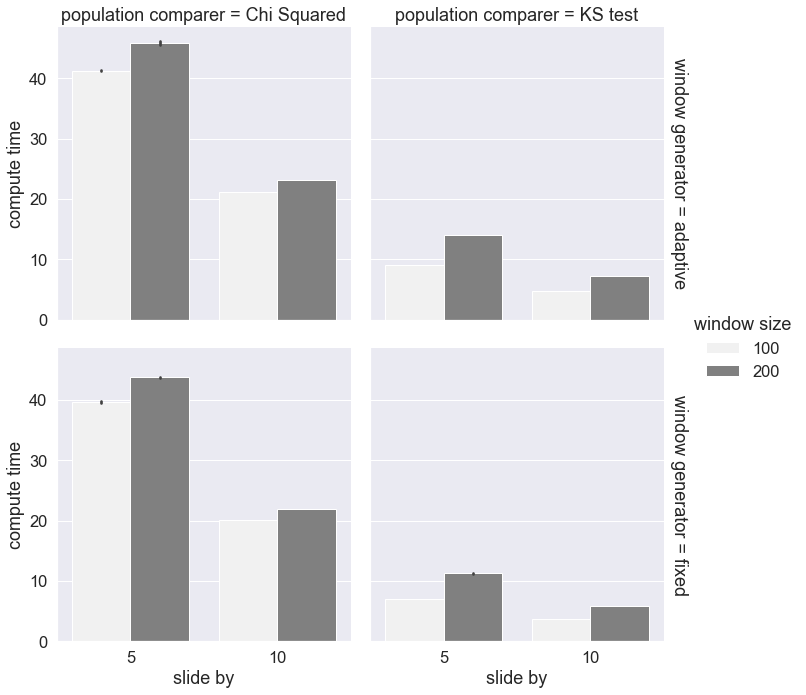

In [ ]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="slide by", y="compute time",
                hue="window size", col="population comparer",
                row="window generator",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [ ]:
f"Compute times where between {min(df['compute time']):.2f} and {max(df['compute time']):.2f} seconds."

'Compute times where between 3.72 and 46.22 seconds.'

- Again no differences between adaptive and fixed window generator
- Chi Squared test much more computationally heavy than KS test
- Decreased window size decreases compute times greatly (for the KS test the compute time is directly proportinal to the computation time)
- Compute time is directly proportional to the slide by, the larger the slide, the less computations.